# WeatherPy
----
A minimum of 500 unique (non-repeat) cities were sampled based on latitude and longitude.
The following plots were generated:

#### Latitude vs. Cloudiness
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Latitude vs. Humidity (%)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time, json, csv
import plotly
import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode, plot

# Import API key
from config import api_key
from config_plotly import plotly_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
c_data = []
record_count = 1
set_count = 1

print("Beginning Data Retrieval")
print("------------------------")
for i,city in enumerate(cities):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&APPID=" + api_key + "&units=Imperial"
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        city_weather = rq.get(url).json()
        c_data.append({
            "city" : city,
            "Lat" : city_weather["coord"]["lat"],
            "Lon" : city_weather["coord"]["lon"],
            "Max Temp" : city_weather["main"]["temp_max"],
            "Humidity" : city_weather["main"]["humidity"],
            "Cloudiness" : city_weather["clouds"]["all"],
            "Wind Speed" : city_weather["wind"]["speed"],
            "Country" : city_weather["sys"]["country"],
            "Date" : city_weather["dt"]
        })
    except:
        print("City not found. Skipping...")
        pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | neyshabur
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | tual
Processing Record 10 of Set 1 | semey
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | havoysund
Processing Record 13 of Set 1 | podgornoye
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | koygorodok
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | pergine valsugana
Processing Record 20 of Set 1 | lima
Processing Record 21 of Set 1 | cairns
Processing Record 22 of Set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
c_df = pd.DataFrame(c_data).rename(columns = {'city' : 'City', 'Lon' : 'Lng'}).sort_index(axis=1)
c_df.to_csv('plotly_cities.csv')
c_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,52,AU,1578408159,85,-23.58,149.07,70.99,9.93
1,neyshabur,0,IR,1578408605,44,36.21,58.79,37.78,5.32
2,hermanus,22,ZA,1578408050,90,-34.42,19.24,69.13,16.69
3,kodiak,1,US,1578408605,80,39.95,-94.76,30.99,10.29
4,saint-philippe,1,CA,1578408605,73,45.36,-73.48,27.00,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

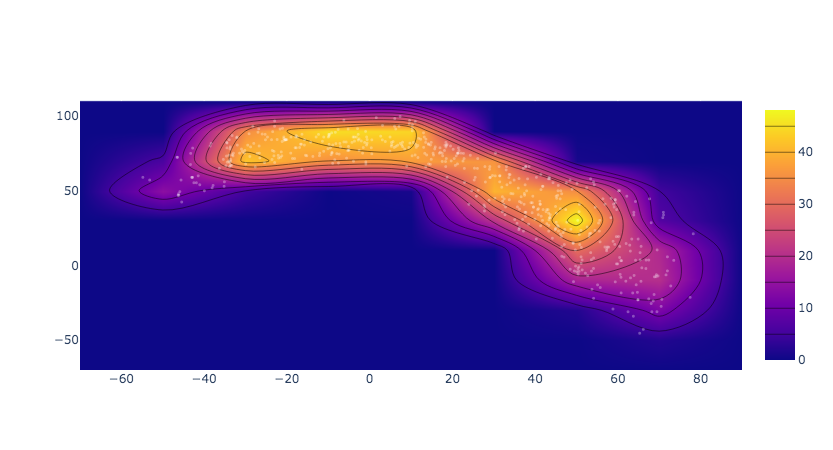

AttributeError: module 'plotly.graph_objects' has no attribute 'update'

In [14]:
x = c_df['Lat']
y_1 = c_df['Max Temp']

iplot([go.Histogram2dContour(x = x, y = y_1, contours = dict(coloring = 'heatmap')),
       go.Scatter(x = x, y = y_1, mode = 'markers', marker = dict(color = 'white', size = 3, opacity = 0.3))], show_link = False)

go.update(
    title={
        'text': "Latitude vs. Max Temp (08/22/18)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#Save and Show Figure
# go.show(renderer="png")
# plt.savefig('lat_vs_max_temp_PLOTLY.png')

#### Latitude vs. Humidity Plot

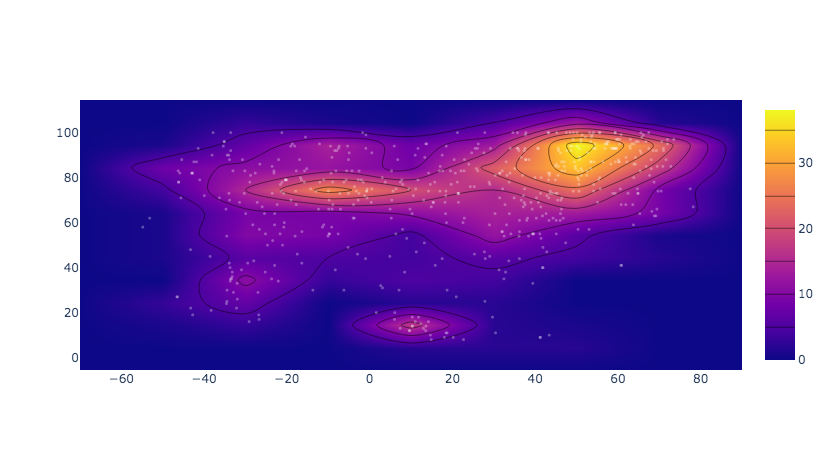

In [6]:
y_2 = c_df['Humidity']

iplot([go.Histogram2dContour(x = x, y = y_2, contours = dict(coloring = 'heatmap')),
       go.Scatter(x = x, y = y_2, mode = 'markers', marker = dict(color = 'white', size = 3, opacity = 0.3))], show_link = False)

#Save and Show Figure
# plt.savefig('lat_vs_humidity_PLOTLY.png')

#### Latitude vs. Cloudiness Plot

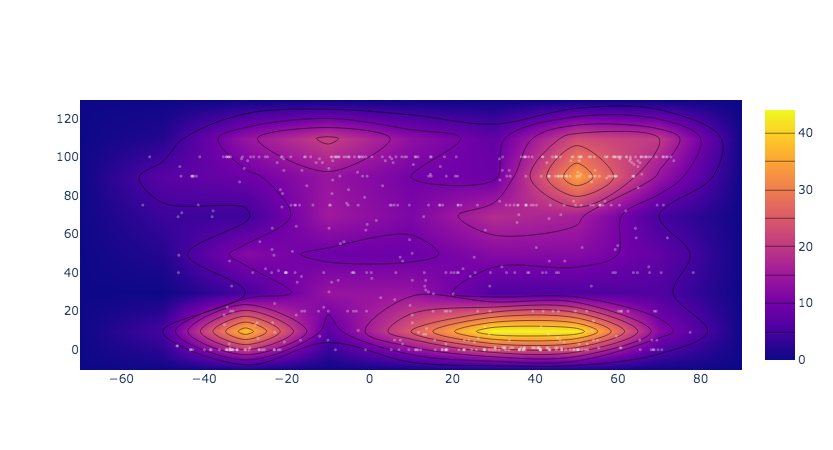

In [8]:
y_3 = c_df['Cloudiness']

iplot([go.Histogram2dContour(x = x, y = y_3, contours = dict(coloring = 'heatmap')),
       go.Scatter(x = x, y = y_3, mode = 'markers', marker = dict(color = 'white', size = 3, opacity = 0.3))], show_link = False)

#Save and Show Figure
# plt.savefig('lat_vs_cloudiness_PLOTLY.png')

#### Latitude vs. Wind Speed Plot

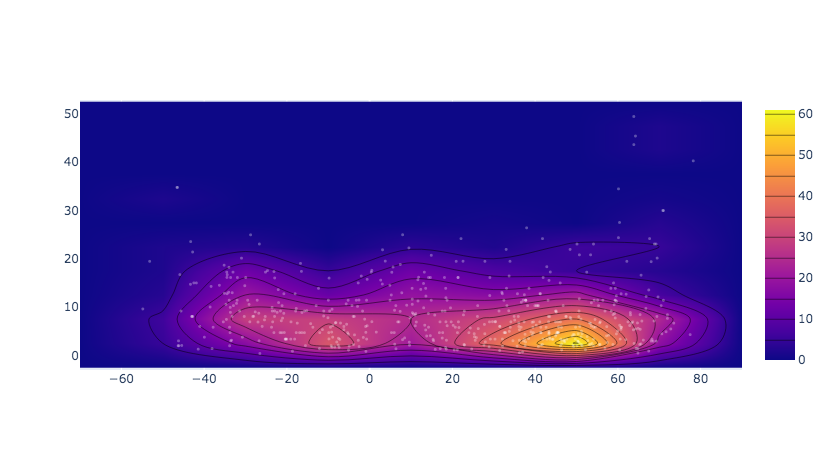

In [9]:
y_4 = c_df['Wind Speed']

iplot([go.Histogram2dContour(x = x, y = y_4, contours = dict(coloring = 'heatmap')),
       go.Scatter(x = x, y = y_4, mode = 'markers', marker = dict(color = 'white', size = 3, opacity = 0.3))], show_link = False)

#Save and Show Figure
# plt.savefig('lat_vs_wind_speed_PLOTLY.png')